In [1]:
#https://github.com/RichardHarwood/3D-Cell-Workflow <- repurposing my old workflow for this. 
import sys
import os
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import pandas as pd
from skimage.measure import label, regionprops, regionprops_table
os.chdir('D:\\PYTHON_VIS_ANALYSIS\\Veronika\\6_Month_Tiffs\\6_Month_Output\\')
output ="D:\\PYTHON_VIS_ANALYSIS\\Veronika\\6_Month_Tiffs\\6_Month_Output\\"
image_dir = "D:\\PYTHON_VIS_ANALYSIS\\Veronika\\6_Month_Tiffs\\"
sample="6_Month_Brain"

In [2]:
cerebel_cortex_name='6_Month_Cerbel_Cortex.tif'
cerebel_plaques_name='6_Month_Cerebel_Plaques.tif'
hippo_name="6_Month_Hippo.tif"
hippo_plaque_name="6_Month_Hippo_Plaque.tif"

In [3]:
import skimage.io as io
cerebel_cortex=io.imread(image_dir + cerebel_cortex_name)
cerebel_plaques=io.imread(image_dir + cerebel_plaques_name)
hippo=io.imread(image_dir + hippo_name)
hippo_plaque=io.imread(image_dir + hippo_plaque_name)

In [30]:
cerebel_plaques.shape

(1601, 1280, 1080)

In [ ]:
plt.ismhow(cerebel_plaques[1200])

In [31]:
hippo_plaque.shape

(1601, 1280, 1080)

In [ ]:
plt.ismhow(hippo_plaque[1200])

In [32]:
hippo.shape

(1601, 1280, 1080)

In [ ]:
plt.ismhow(hippo[1200])

In [33]:
cerebel_cortex.shape

(1601, 1280, 1080)

In [ ]:
plt.ismhow(cerebel_cortex[1200])

### These Images are 10.326 (XY) and 2.5 (Z) units are um

In [4]:
from skimage import measure
import numpy as np
from stl import mesh
from skimage.measure import label, regionprops, regionprops_table

In [5]:
X=10.326
Y=10.326
Z=2.5

## Hippocampus Plaque

In [6]:
vertices, faces, normals, values = measure.marching_cubes(hippo_plaque, level=None,
                                                          spacing=(Z, X,Y), gradient_direction='descent', step_size=1, 
                                                          allow_degenerate=True) 
hippo_plaque_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        hippo_plaque_mesh .vectors[i][j] = vertices[f[j],:]

In [7]:
hippo_plaque_mesh.save(sample +'hippo_plaque_3D.stl')

In [8]:
import pyvista as pv

In [9]:
Hippocampus_plaque_stl = pv.read(output+sample +"hippo_plaque_3D.stl")

In [26]:
hippo_plaque_volume = regionprops_table(hippo_plaque, properties=('area',))
hippo_plaque_volume=pd.DataFrame(hippo_plaque_volume)
print ("The total volume of hippo_plaque in um3 is")
hippo_plaque_volume*10.326*10.326*2.5

The total volume of hippo_plaque in um3 is


,area
0,9.837367e+07


In [81]:
hippo_plaque_volume.to_csv("hippo_plaque_volume_1x1x1voxeldims.csv")

## Cerebral Cortex Plaques

In [12]:
vertices, faces, normals, values = measure.marching_cubes(cerebel_plaques, level=None,
                                                          spacing=(Z, X,Y), gradient_direction='descent', step_size=1, 
                                                          allow_degenerate=True) 
cerebel_plaques_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cerebel_plaques_mesh .vectors[i][j] = vertices[f[j],:]

In [17]:
cerebel_plaques_mesh.save(sample +'_cerebel_plaque_3D.stl')

In [18]:
cerebel_plaques_stl = pv.read(output+sample +"_cerebel_plaque_3D.stl")

In [28]:
cerebel_plaques_volume = regionprops_table(cerebel_plaques, properties=('area',))
cerebel_plaques_volume=pd.DataFrame(cerebel_plaques_volume)
print ("The total volume of cerebel_plaques in um3 is")
cerebel_plaques_volume*10.326*10.326*2.5

The total volume of cerebel_plaques in um3 is


,area
0,5.623470e+06


In [82]:
cerebel_plaques_volume.to_csv("cerebel_plaques_volume_1x1x1voxeldims.csv")

## Hippocampus


In [34]:
vertices, faces, normals, values = measure.marching_cubes(hippo, level=None,
                                                          spacing=(Z, X,Y), gradient_direction='descent', step_size=1, 
                                                          allow_degenerate=True) 
hippo_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        hippo_mesh .vectors[i][j] = vertices[f[j],:]

In [35]:
hippo_mesh.save(sample +'_hippo_3D.stl')

In [36]:
hippo_mesh_stl = pv.read(output+sample +"_hippo_3D.stl")

In [41]:
hippo_volume = regionprops_table(hippo, properties=('area',))
hippo_volume=pd.DataFrame(hippo_volume)
print ("The total volume of hippo in um3 is")
hippo_volume*10.326*10.326*2.5

The total volume of hippo in um3 is


,area
0,4.243276e+10


In [84]:
hippo_volume.to_csv("hippo_volume_1x1x1voxeldims.csv")

## Cerebal Cortex

In [42]:
vertices, faces, normals, values = measure.marching_cubes(cerebel_cortex, level=None,
                                                          spacing=(Z, X,Y), gradient_direction='descent', step_size=1, 
                                                          allow_degenerate=True) 
cerebel_cortex_mesh = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))
for i, f in enumerate(faces):
    for j in range(3):
        cerebel_cortex_mesh .vectors[i][j] = vertices[f[j],:]

In [43]:
cerebel_cortex_mesh.save(sample +'_cerebel_cortex_3D.stl')

In [44]:
cerebel_cortex_stl = pv.read(output+sample +"_cerebel_cortex_3D.stl")

In [52]:
cerebel_cortex_volume = regionprops_table(cerebel_cortex, properties=('area',))
cerebel_cortex_volume=pd.DataFrame(cerebel_cortex_volume)
print ("The total volume of cerebel_cortex in um3 is")
cerebel_cortex_volume*10.326*10.326*2.5

The total volume of cerebel_cortex in um3 is


,area
0,9.818975e+09


In [85]:
cerebel_cortex_volume.to_csv("cerebel_cortex_volume_1x1x1voxeldims.csv")

## Visualise everything 

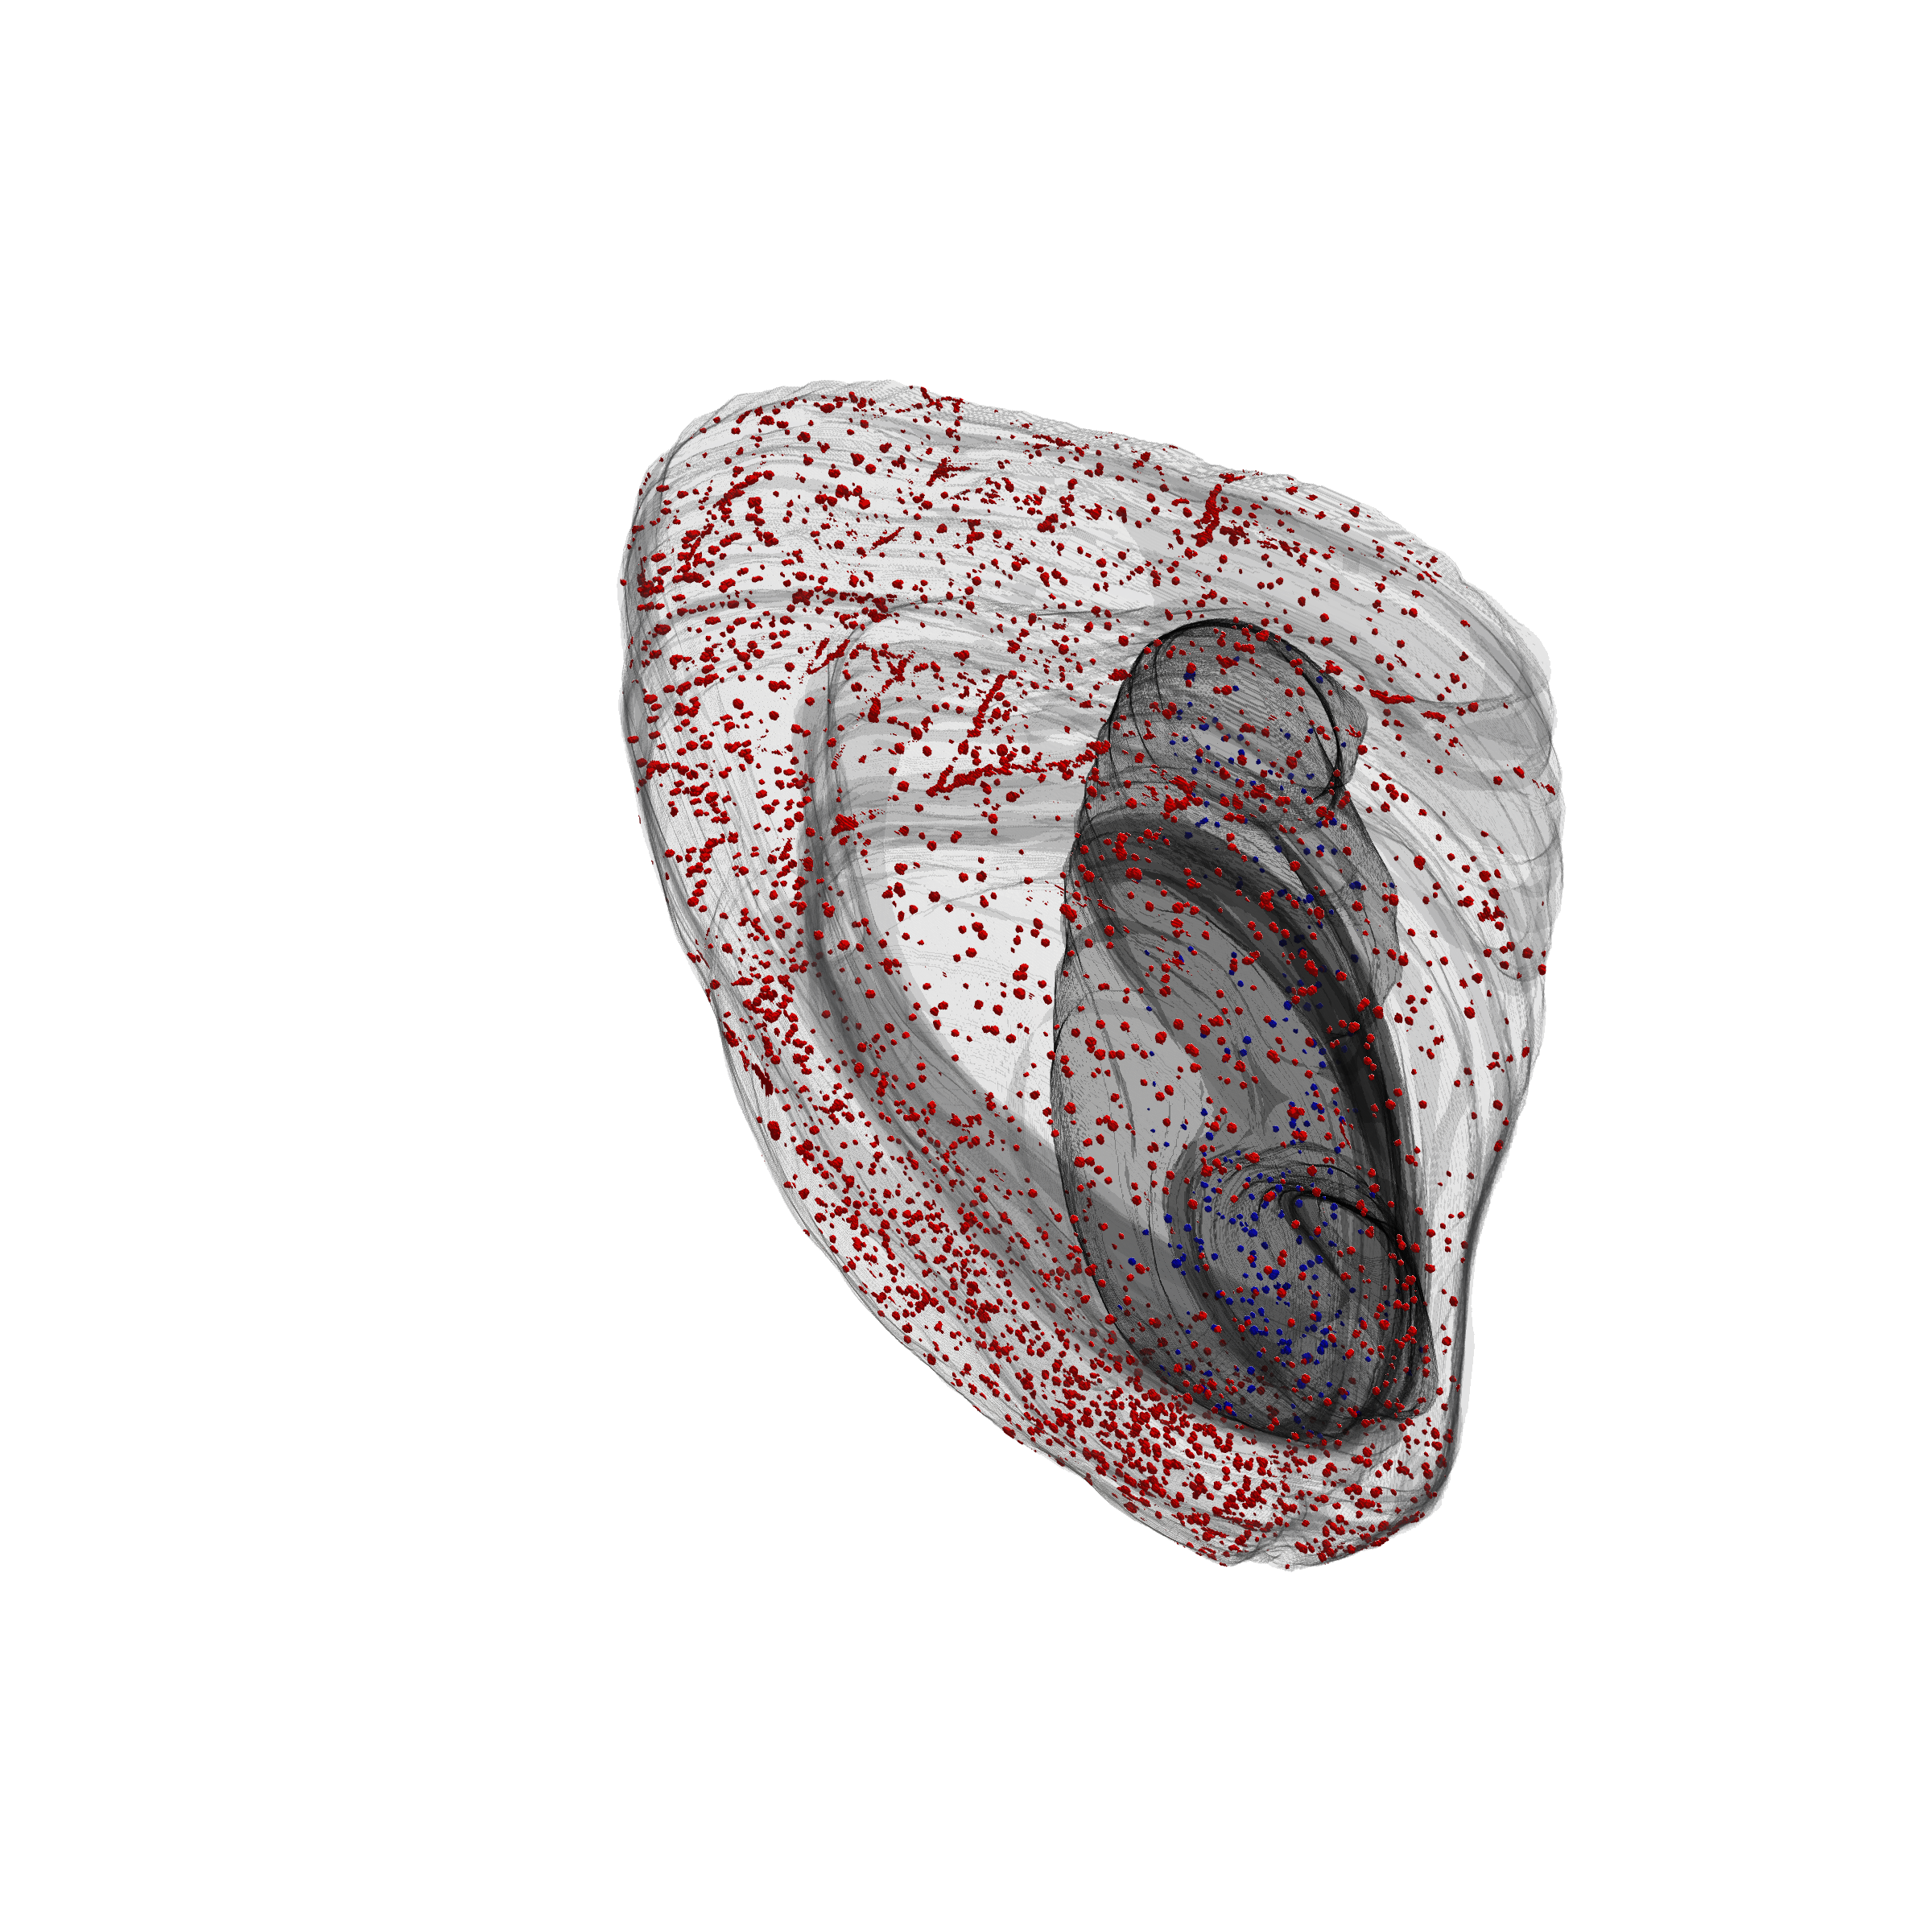

In [72]:
pv.set_plot_theme("document")
p = pv.Plotter(window_size=[2400, 2400])
p.add_mesh(cerebel_plaques_stl, color="blue", opacity=1)
p.add_mesh(Hippocampus_plaque_stl, color="red", opacity=1)
p.add_mesh(hippo_mesh_stl, color="grey", opacity=0.07)
p.add_mesh(cerebel_cortex_stl, color="black", opacity=0.15)
p.screenshot(sample+'image.png')  
p.show(jupyter_backend='static')

### Animate the visulation 

In [79]:
# Brain Movie
p = pv.Plotter()
p.add_mesh(cerebel_plaques_stl, color="blue", opacity=1)
p.add_mesh(Hippocampus_plaque_stl, color="red", opacity=1)
p.add_mesh(hippo_mesh_stl, color="grey", opacity=0.07)
p.add_mesh(cerebel_cortex_stl, color="black", opacity=0.15)
path = p.generate_orbital_path(n_points=500, shift=cerebel_cortex_stl.length)
p.window_size = 2400, 2400
#p.open_gif(sample+'brain_MOVIE.gif')
p.open_movie(sample+'brain_MOVIE_HQ.mp4')
p.orbit_on_path(path, write_frames=True)
p.close()


In [80]:
# Brain Movie
p = pv.Plotter()
p.add_mesh(cerebel_plaques_stl, color="blue", opacity=1)
p.add_mesh(Hippocampus_plaque_stl, color="red", opacity=1)
p.add_mesh(hippo_mesh_stl, color="grey", opacity=0.07)
p.add_mesh(cerebel_cortex_stl, color="black", opacity=0.15)
path = p.generate_orbital_path(n_points=300, shift=cerebel_cortex_stl.length)
p.window_size = 1200, 1200
#p.open_gif(sample+'brain_MOVIE.gif')
p.open_movie(sample+'brain_MOVIE_LQ.mp4')
p.orbit_on_path(path, write_frames=True)
p.close()